## Якушечкин Олег ##

### Лабораторная работа №2

Реализовать и исследовать математическую модель Вольтерра - Лотки для имитации межвидового взаимодействия. Сформулировать критерий "устойчивости" 
биологической системы на основе численности особей на произвольно заданном интервале моделирования. Отыскать экстремум предложенного критерия 
как функции 4-х параметров модели.

В качестве критерия усточивости была выбрана максимизация разницы между хищниками и жертвами совместно с увеличением числа особей 
(и хищников и жертв).

[1.99794905 2.00228436 0.99360785 2.00303347]


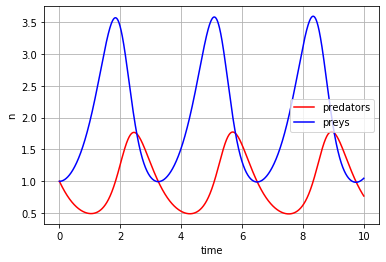

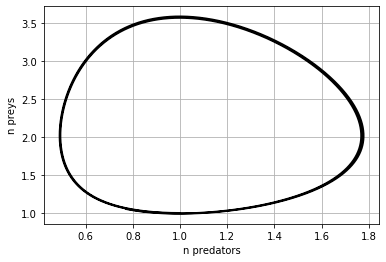

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
import math

class Biome(object):

    def __init__(self, pred_init=1, prey_init=1, tmax=10, dt=0.001):
        self._dt = dt
        self._n_iters = int(tmax / dt)
        # Intial state
        self.pred_init = pred_init
        self.prey_init = prey_init
        # Data arrays
        self.time = None
        self.prey = None
        self.pred = None

    def run(self, alpha, beta, delta, gamma):
        """
        Simulation settings:
            alpha - prey growth
            beta - prey mortality
            delta - predator growrh
            gamma - predator mortality
        """
        self.time = np.zeros(self._n_iters)
        self.prey = np.zeros(self._n_iters)
        self.pred = np.zeros(self._n_iters)
        self.prey[0] = self.prey_init
        self.pred[0] = self.pred_init
        # Lotka-Volterra equations
        for i in range(self._n_iters - 1):
            self.prey[i + 1] = self.prey[i] + self._dt * self.prey[i] * (alpha - self.pred[i] * beta)
            self.pred[i + 1] = self.pred[i] + self._dt * self.pred[i] * (delta * self.prey[i] - gamma)
        self.time[1:] = np.add.accumulate([self._dt] * (self._n_iters - 1))
        return self.time, self.prey, self.pred

    def plot(self):
        plt.xlabel('time')
        plt.ylabel('n')
        plt.plot(self.time, self.pred, label='predators', color='r')
        plt.plot(self.time, self.prey, label='preys', color='b')
        plt.legend()
        plt.grid()
        plt.show()

    def plot_cycle(self):
        plt.xlabel('n predators')
        plt.ylabel('n preys')
        plt.plot(self.pred, self.prey, color='black')
        plt.grid()
        plt.show()


def main():
    koef = minimize(maxdif, [2, 2, 1, 2])
    print(koef.x)
    biome = Biome(tmax=10)
    biome.run(koef.x[0], koef.x[1], koef.x[2], koef.x[3])
    biome.plot()
    biome.plot_cycle()
#main()

def maxdif(par):
    maxd=0
    max_prey=0
    max_pred=0
    min_pred = 0
    biome = Biome(tmax=10)
    biome.run(par[0],par[1],par[2],par[3])
    for i in range(0,biome._n_iters):
        if math.fabs(biome.prey[i]-biome.pred[i]) > maxd:
            maxd = math.fabs(biome.prey[i]-biome.pred[i])
        if max_prey < biome.prey[i]:
            max_prey= biome.prey[i]
        if max_pred < biome.pred[i]:
            max_pred= biome.pred[i]
    del biome
    return math.fabs(1-maxd/((max_prey+max_pred)/2))

main()